# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
#Loading train dataset:-

df_train=pd.read_excel(r'Data_Train.xlsx')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
#Loading test dataset:-

df_test=pd.read_excel(r'Data_Test.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
df_train.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [8]:
df_test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [9]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [10]:
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [11]:
print(df_train.shape)

(12690, 9)


In [12]:
print(df_test.shape)

(4231, 8)


# Exploratory Data Analysis(EDA):-

In [13]:
print("The shape of the train dataset is:",df_train.shape)

The shape of the train dataset is: (12690, 9)


In [14]:
print("The shape of the test dataset is:",df_test.shape)

The shape of the test dataset is: (4231, 8)


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [17]:
#Checking unique values in train dataset:-

for i in df_train.columns:
    print('Unique values in:', i,df_train[i].nunique())

Unique values in: TITLE 113
Unique values in: RESTAURANT_ID 11892
Unique values in: CUISINES 4155
Unique values in: TIME 2689
Unique values in: CITY 359
Unique values in: LOCALITY 1416
Unique values in: RATING 32
Unique values in: VOTES 1847
Unique values in: COST 86


In [18]:
#Checking unique values in train dataset:-

for i in df_test.columns:
    print('Unique values in:', i,df_test[i].nunique())

Unique values in: TITLE 86
Unique values in: RESTAURANT_ID 4127
Unique values in: CUISINES 1727
Unique values in: TIME 1183
Unique values in: CITY 151
Unique values in: LOCALITY 834
Unique values in: RATING 31
Unique values in: VOTES 1136


In [19]:
import re

In [20]:
def extract_closed(time):
    a=re.findall('Closed \(.*?\)',time)
    if a != []:
        return a[0]
    else:
        return 'NA'
df_test['CLOSED']=df_test['TIME'].apply(extract_closed)

In [21]:
df_train['TIME']=df_train['TIME'].str.replace(r'Closed \(.*?\)','')

In [22]:
df_train['RATING']=df_train['RATING'].str.replace('NEW','1')
df_train['RATING']=df_train['RATING'].str.replace('-','1').astype(float)

In [23]:
df_train['VOTES']=df_train['VOTES'].str.replace('votes','').astype(float)

In [24]:
df_train['CITY'].fillna('Missing',inplace=True)
df_train['LOCALITY'].fillna('Missing',inplace=True)
df_train['RATING'].fillna(3.8,inplace=True)
df_train['VOTES'].fillna(0.0,inplace=True)

In [25]:
df_train['COST']=df_train['COST'].astype(float)

In [26]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0


In [27]:
def extract_closed(time):
    a=re.findall('Closed \(.*?\)',time)
    if a != []:
        return a[0]
    else:
        return 'NA'
df_test['CLOSED']=df_test['TIME'].apply(extract_closed)

In [28]:
df_test['TIME']=df_test['TIME'].str.replace(r'Closed \(.*?\)','')

In [29]:
df_test['RATING']=df_test['RATING'].str.replace('NEW','1')
df_test['RATING']=df_test['RATING'].str.replace('-','1').astype(float)

In [30]:
df_test['VOTES']=df_test['VOTES'].str.replace('votes','').astype(float)

In [31]:
df_test['CITY'].fillna('Missing',inplace=True)
df_test['LOCALITY'].fillna('Missing',inplace=True)
df_test['RATING'].fillna(3.8,inplace=True)
df_test['VOTES'].fillna(0.0,inplace=True)

In [32]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CLOSED
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,NA
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,NA
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,NA
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,NA
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,NA


In [33]:
df_test.drop(['CLOSED'],axis=1,inplace=True)

In [34]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0


# Description:-

In [35]:
df_train.describe(include='all')

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690,12690.000000,12690,12690,12690,12690,12690.000000,12690.000000,12690.000000
unique,113,NaN,4155,2689,360,1417,NaN,NaN,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,NaN,NaN,NaN
freq,4218,NaN,532,1415,2174,166,NaN,NaN,NaN
mean,NaN,7759.134121,NaN,NaN,NaN,NaN,3.521615,376.231127,655.252246
std,NaN,4504.874150,NaN,NaN,NaN,NaN,0.909180,810.946942,627.003540
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,20.000000
25%,NaN,3863.250000,NaN,NaN,NaN,NaN,3.400000,39.250000,300.000000
50%,NaN,7740.000000,NaN,NaN,NaN,NaN,3.800000,132.000000,500.000000
75%,NaN,11688.750000,NaN,NaN,NaN,NaN,4.000000,405.000000,800.000000


In [36]:
df_test.describe(include='all')

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231,4231.000000,4231,4231,4231,4231,4231.000000,4231.000000
unique,86,NaN,1727,1183,152,835,NaN,NaN
top,QUICK BITES,NaN,"North Indian, Chinese",11am – 11pm (Mon-Sun),Bangalore,Kukatpally,NaN,NaN
freq,1416,NaN,213,447,686,54,NaN,NaN
mean,NaN,7791.438431,NaN,NaN,NaN,NaN,3.518577,388.935713
std,NaN,4458.797621,NaN,NaN,NaN,NaN,0.912387,800.940258
min,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,3908.500000,NaN,NaN,NaN,NaN,3.400000,42.000000
50%,NaN,7798.000000,NaN,NaN,NaN,NaN,3.800000,134.000000
75%,NaN,11634.000000,NaN,NaN,NaN,NaN,4.000000,422.500000


In [37]:
df_train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST             float64
dtype: object

In [38]:
df_test.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
dtype: object

In [39]:
df_train.corr()

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.033498,0.000739,0.040710
RATING,0.033498,1.000000,0.286580,0.258918
VOTES,0.000739,0.286580,1.000000,0.257231
COST,0.040710,0.258918,0.257231,1.000000


In [40]:
df_test.corr()

,RESTAURANT_ID,RATING,VOTES
RESTAURANT_ID,1.000000,0.032378,0.001730
RATING,0.032378,1.000000,0.299017
VOTES,0.001730,0.299017,1.000000


In [41]:
#Explore the categorical features in train dataset:-

categorical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

In [42]:
#Explore the categorical features in test dataset:-

categorical_features=[feature for feature in df_test.columns if ((df_test[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

In [43]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is TITLE and number of categories are 113
The feature is CUISINES and number of categories are 4155
The feature is TIME and number of categories are 2689
The feature is CITY and number of categories are 360
The feature is LOCALITY and number of categories are 1417


In [44]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test[feature].unique())))

The feature is TITLE and number of categories are 86
The feature is CUISINES and number of categories are 1727
The feature is TIME and number of categories are 1183
The feature is CITY and number of categories are 152
The feature is LOCALITY and number of categories are 835


# Data Analysis and Visualization:-

In [45]:
df_train['COST'].value_counts()

300.0      1595
400.0      1357
500.0      1300
200.0      1031
600.0       806
           ... 
8000.0        1
14000.0       1
5200.0        1
80.0          1
70.0          1
Name: COST, Length: 86, dtype: int64

# Countplot:-

300.0      1595
400.0      1357
500.0      1300
200.0      1031
600.0       806
           ... 
8000.0        1
14000.0       1
5200.0        1
80.0          1
70.0          1
Name: COST, Length: 86, dtype: int64

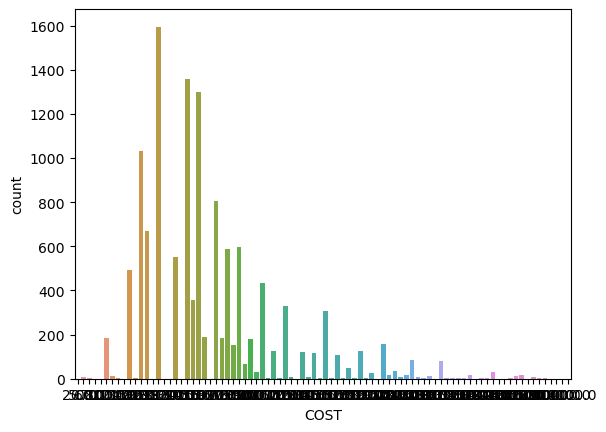

In [46]:
#Making the count plot for 'target column' column:

sns.countplot(x='COST',data=df_train)
df_train['COST'].value_counts()

3.9    1238
1.0    1202
3.8    1192
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

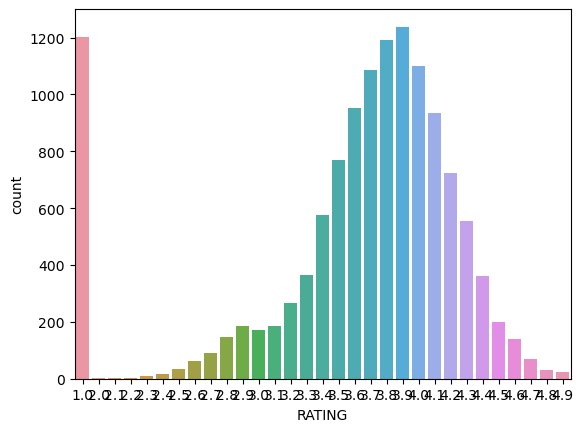

In [47]:
#Making the count plot for 'rating' column:

sns.countplot(x='RATING',data=df_train)
df_train['RATING'].value_counts()

3.8    416
3.9    405
1.0    400
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
3.5    217
3.4    202
4.3    184
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

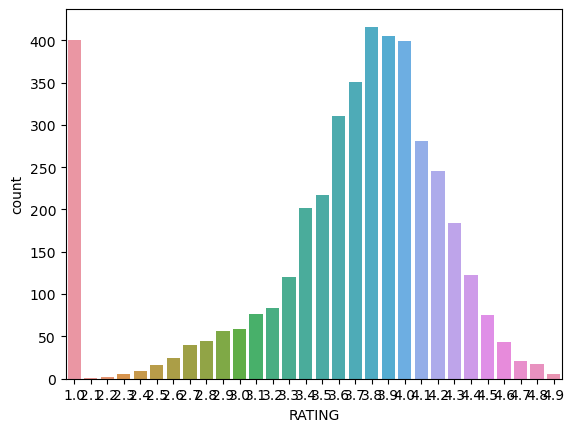

In [48]:
#Making the count plot for 'rating' column:

sns.countplot(x='RATING',data=df_test)
df_test['RATING'].value_counts()

# Histogram:-

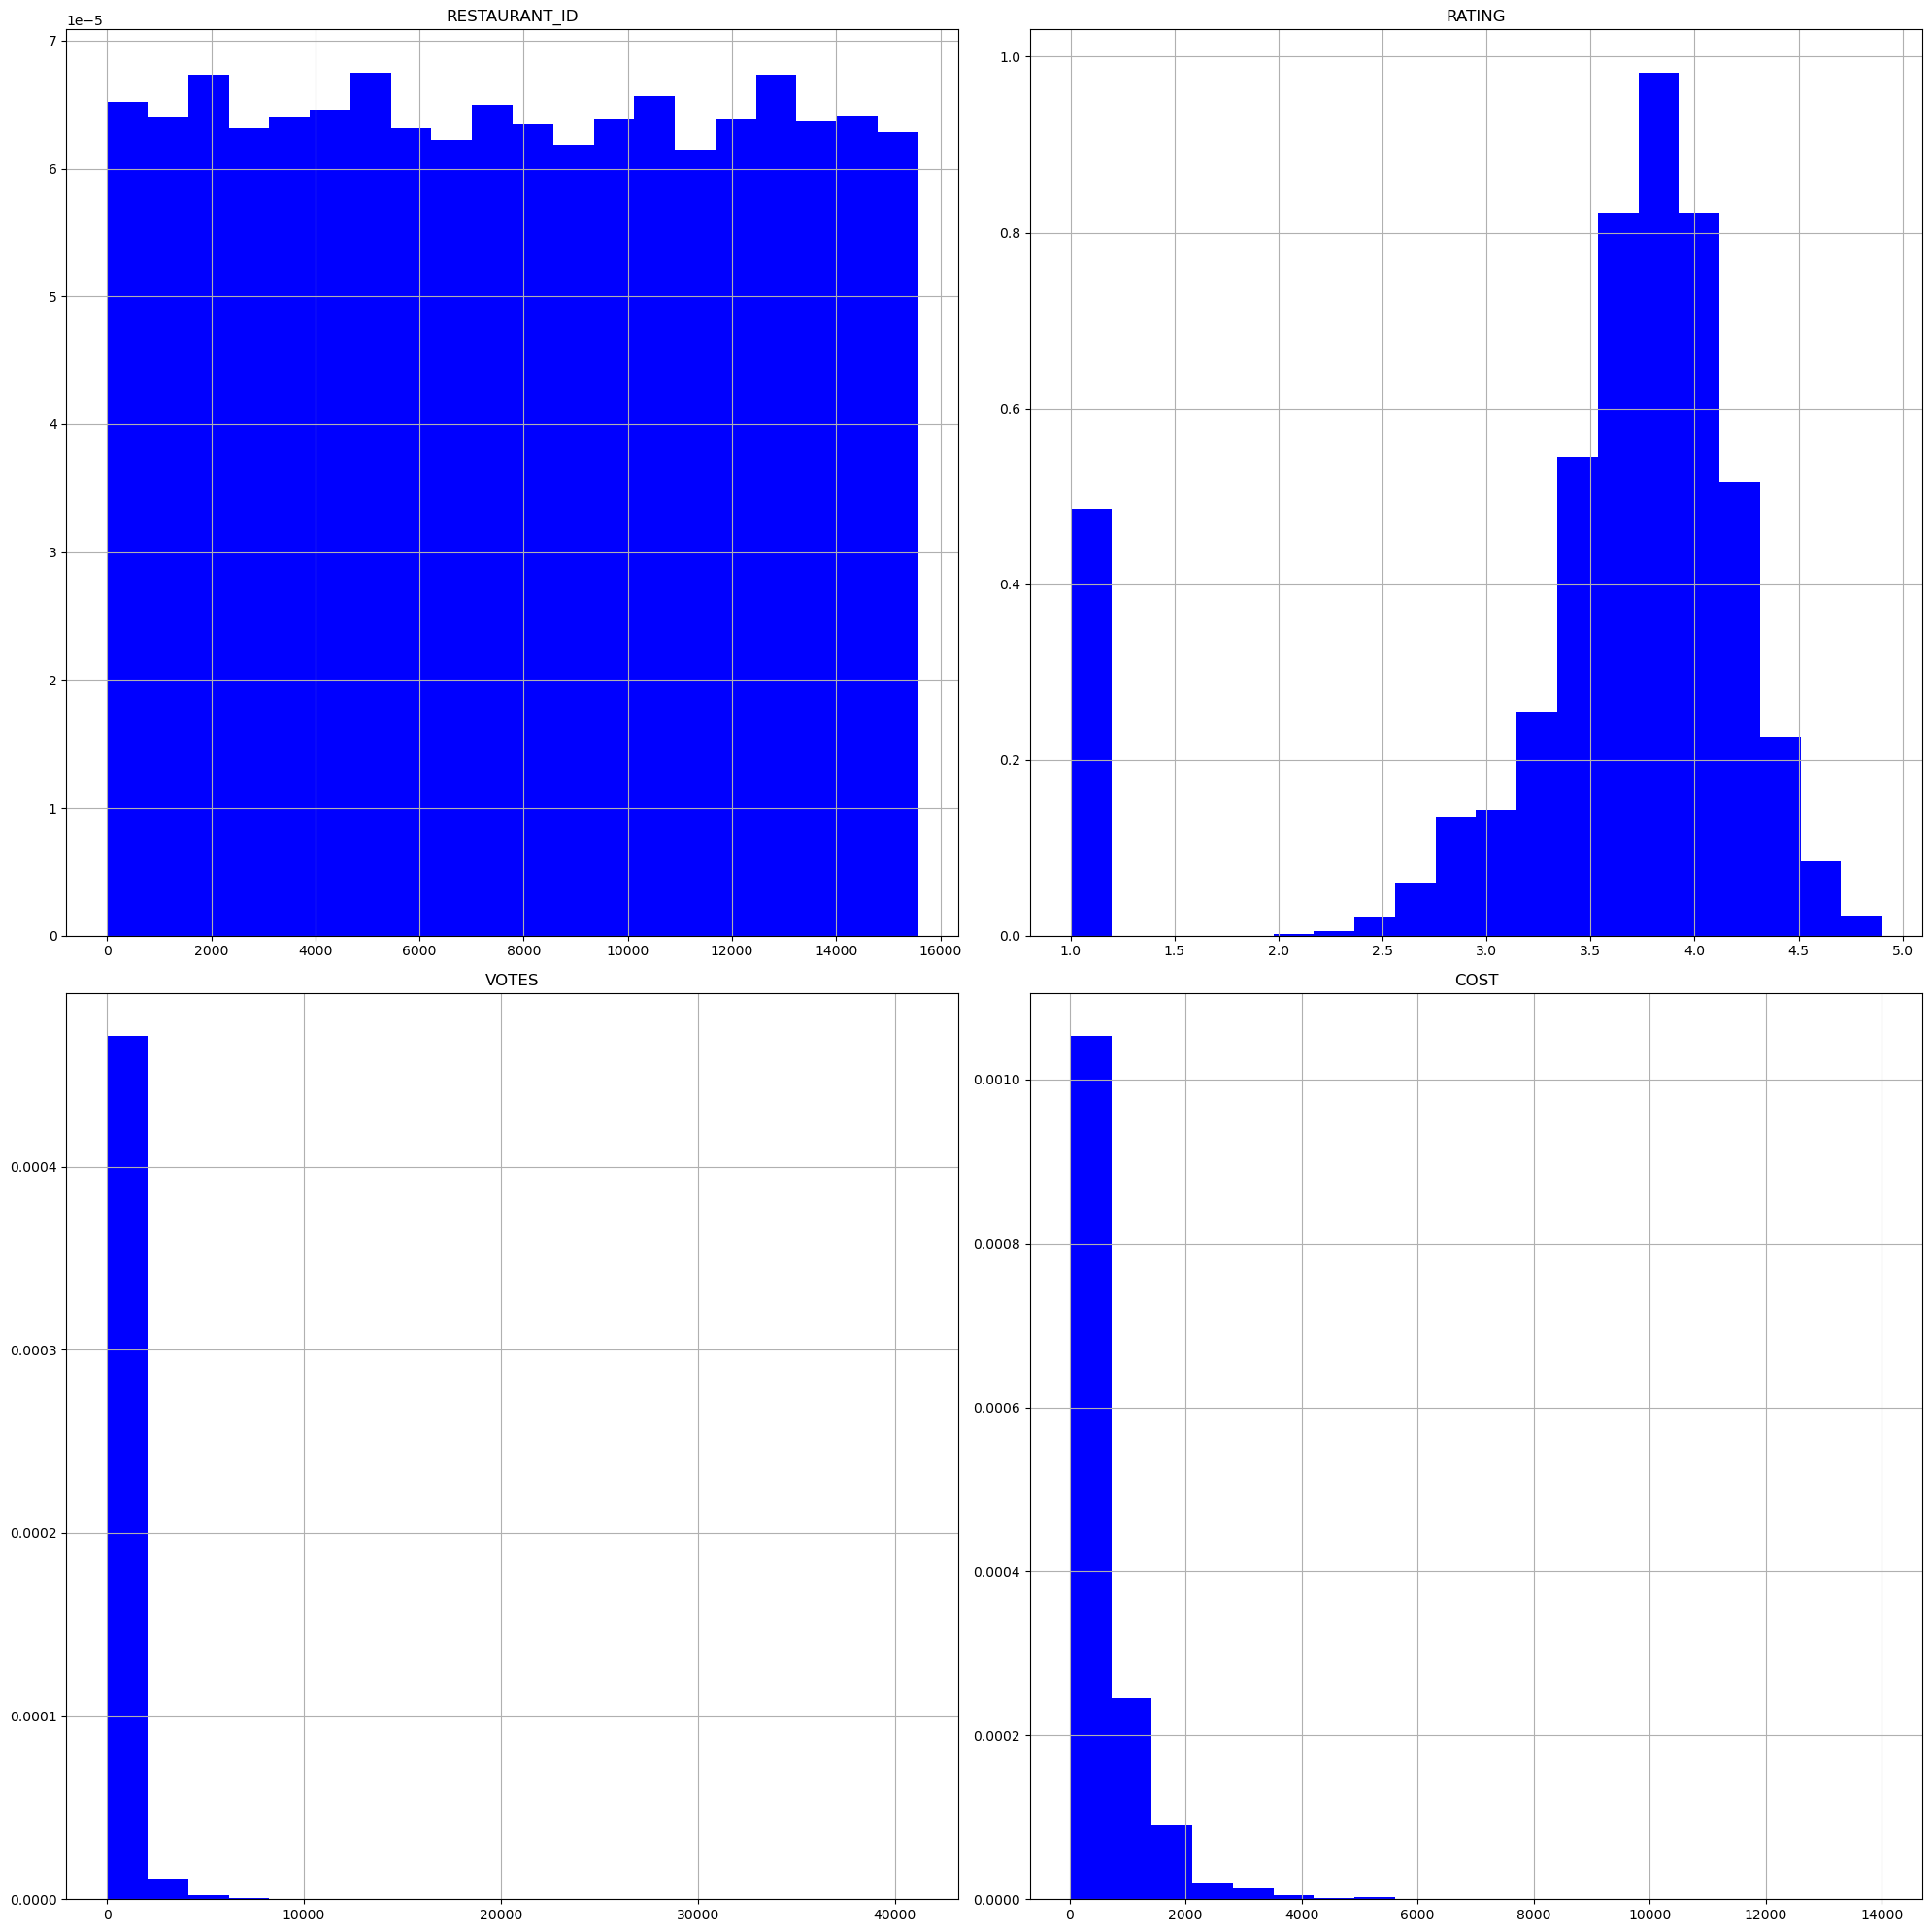

In [49]:
plt.rcParams['figure.figsize']=(20,20)
df_train.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

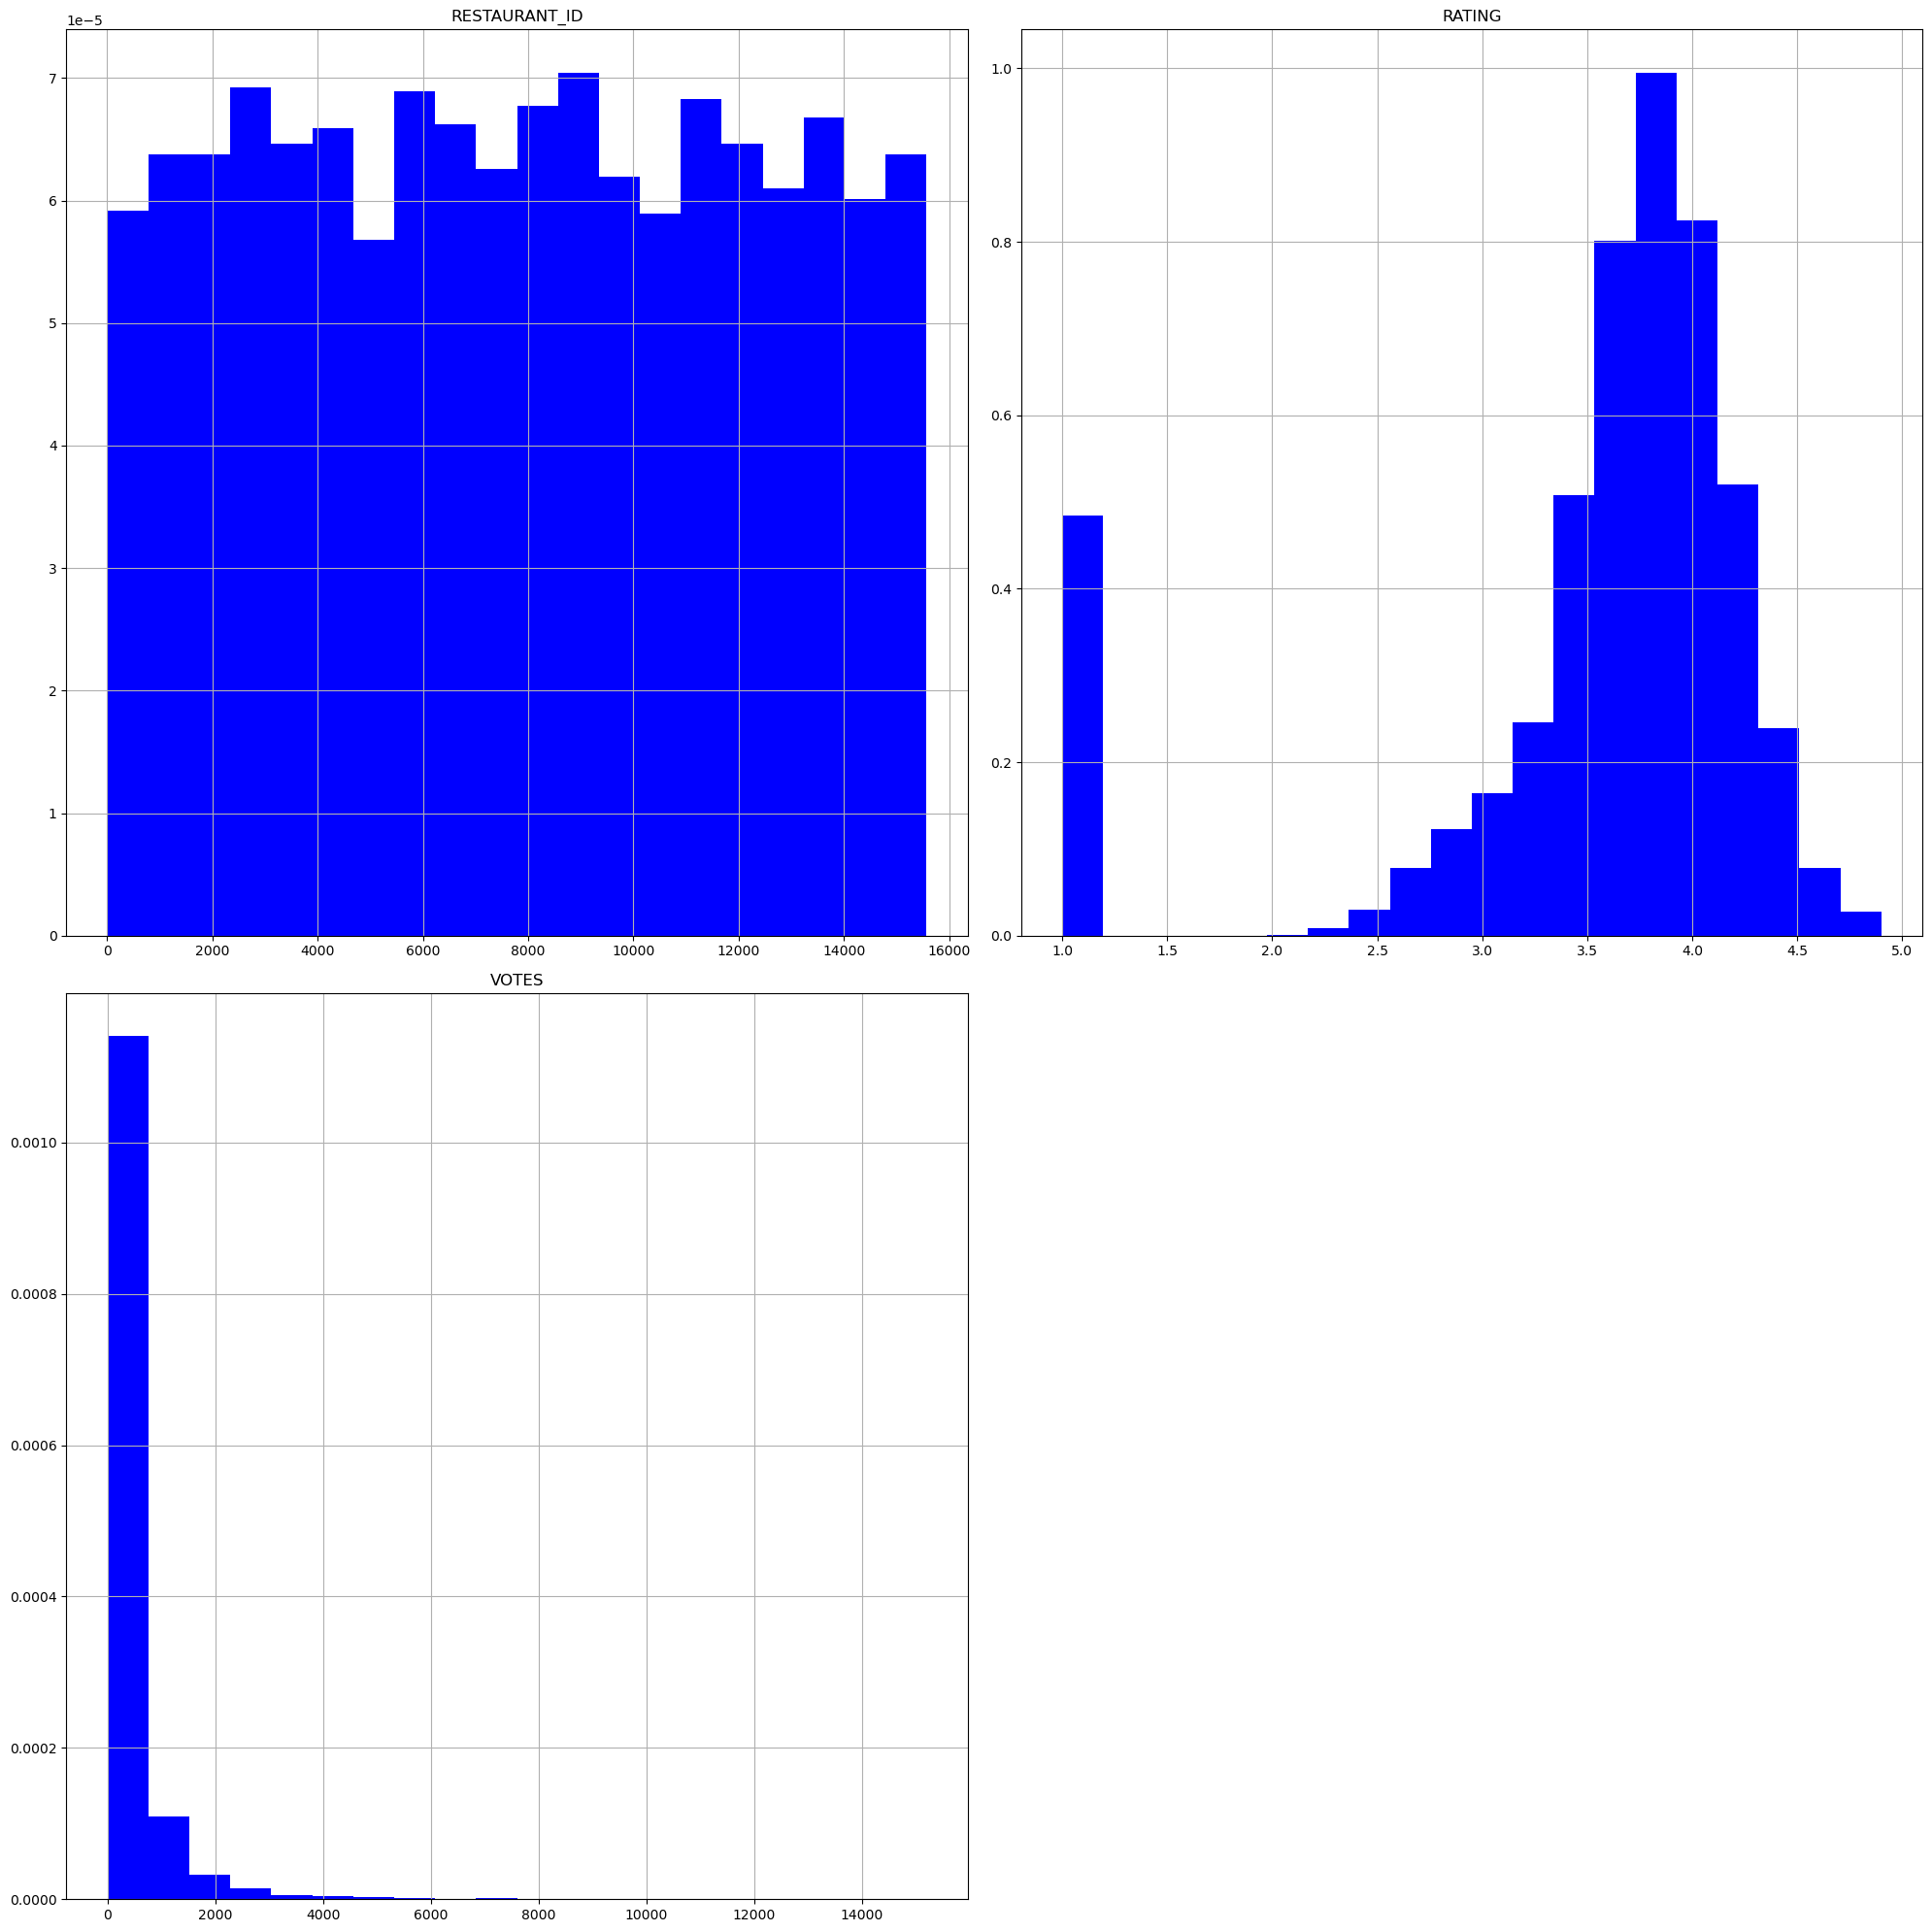

In [50]:
plt.rcParams['figure.figsize']=(20,20)
df_test.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [51]:
#List of numerical variables:-
numerical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes != 'O') & (feature not in ['subscribed']))]
print('Number of numerical variables:',len(numerical_features))

#visualise the numerical variables:-
df_train[numerical_features].head()

Number of numerical variables: 4


,RESTAURANT_ID,RATING,VOTES,COST
0,9438,3.6,49.0,1200.0
1,13198,4.2,30.0,1500.0
2,10915,3.8,221.0,800.0
3,6346,4.1,24.0,800.0
4,15387,3.8,165.0,300.0


In [52]:
numerical_features=[feature for feature in df_test.columns if ((df_test[feature].dtypes != 'O'))]
print('Number of numerical variables:',len(numerical_features))

#visualise the numerical variables:-
df_test[numerical_features].head()

Number of numerical variables: 3


,RESTAURANT_ID,RATING,VOTES
0,4085,4.3,564.0
1,12680,4.2,61.0
2,1411,3.8,350.0
3,204,3.8,1445.0
4,13453,3.6,23.0


In [53]:
#Checking discrete features:-

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:0


In [54]:
#Checking discrete features:-

discrete_feature=[feature for feature in numerical_features if len(df_test[feature].unique())<25]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:0


In [55]:
#Checking continuous features:-

continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['COST']]
print('Continuous Features Count:{}'.format(len(continuous_features)))

Continuous Features Count:3


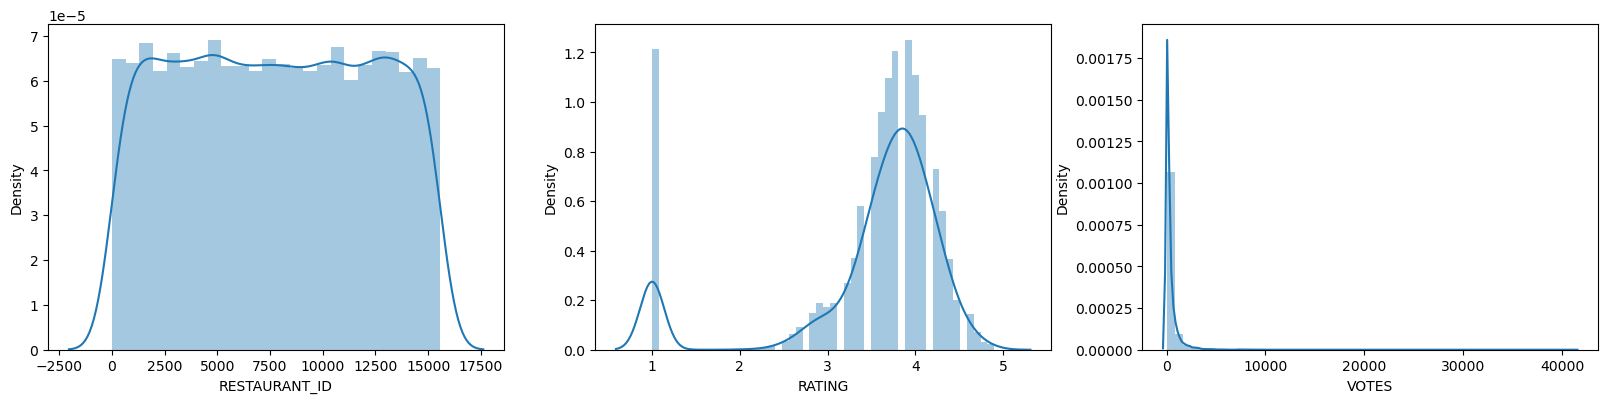

In [56]:
#plot a univariate distribution of continuous observations:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

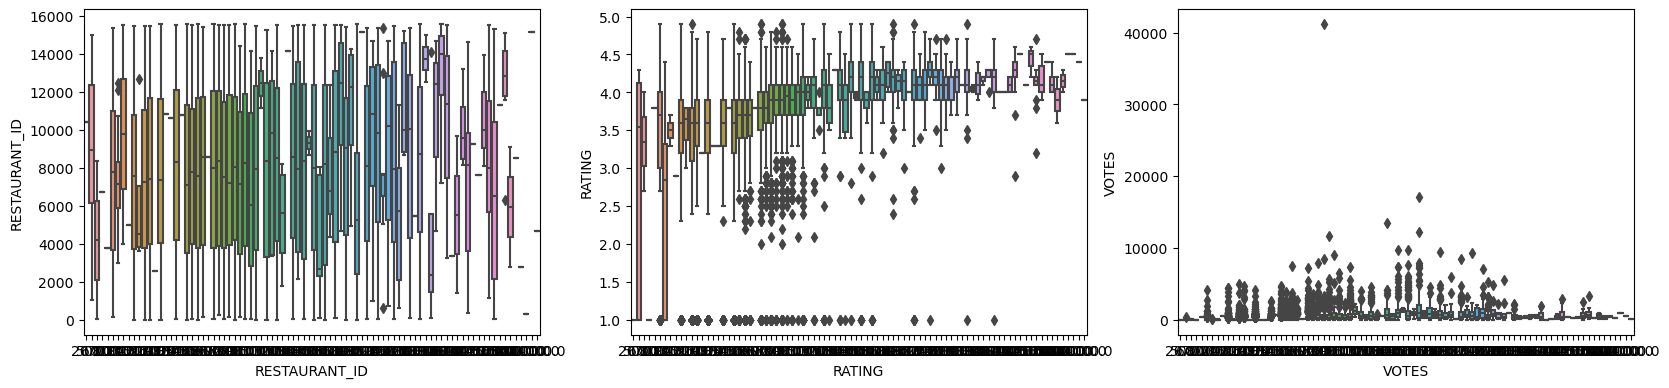

In [57]:
#boxplot to show target distribution with respect numerical features:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='COST',y=df_train[feature],data=df_train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

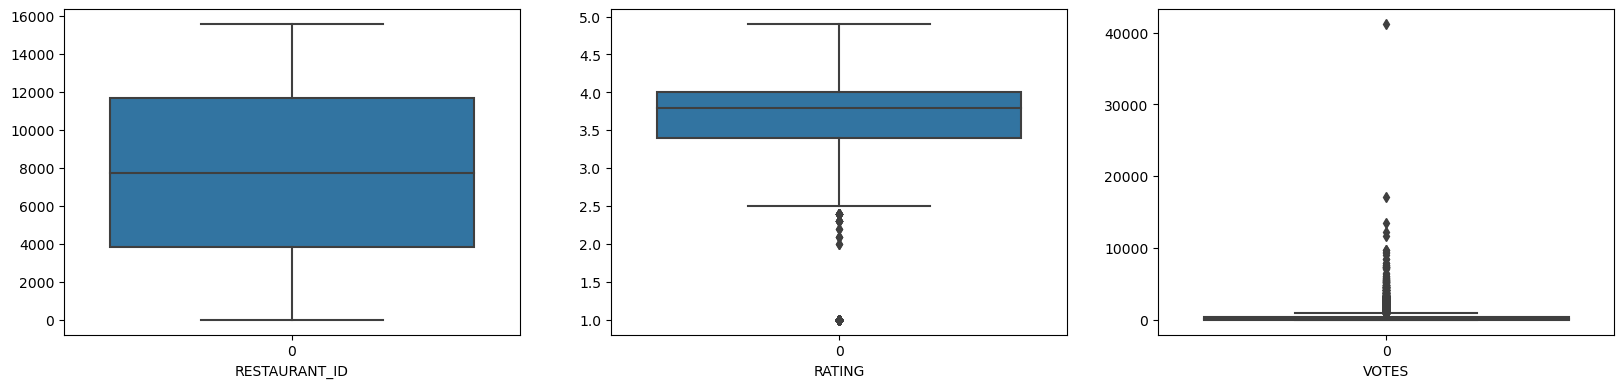

In [58]:
#boxplot on numerical features to find outliers in train dataset:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

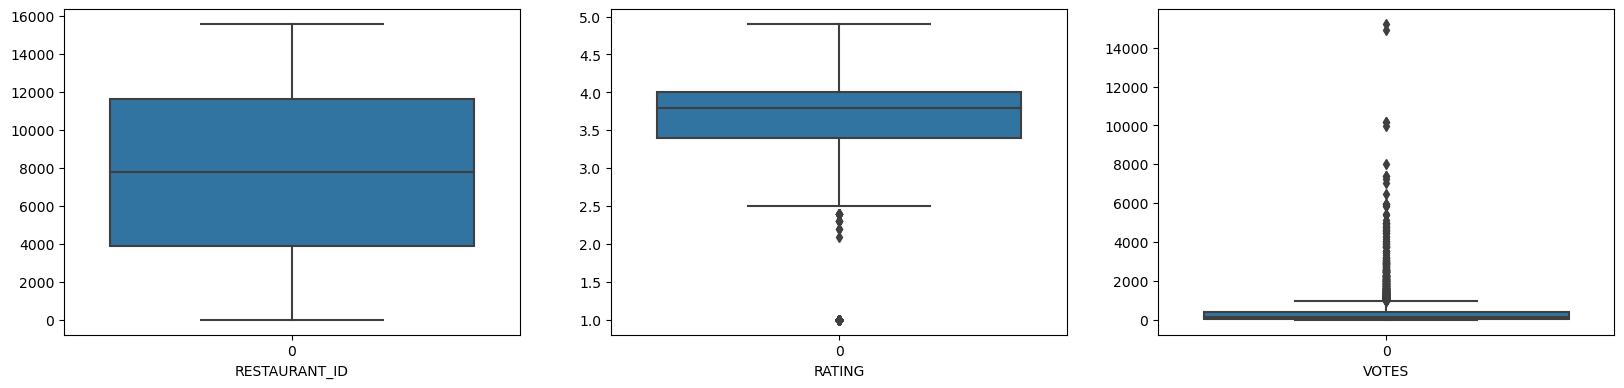

In [59]:
#boxplot on numerical features to find outliers in test dataset:-

plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_test[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<Axes: >

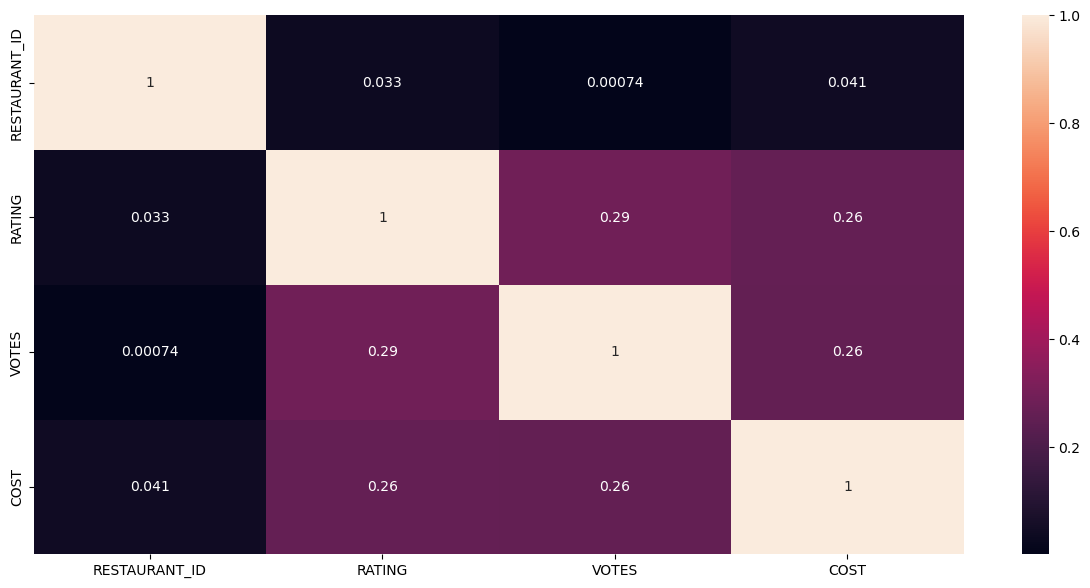

In [60]:
#checking for correlation in train dataset:-

cor_mat=df_train.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

<Axes: >

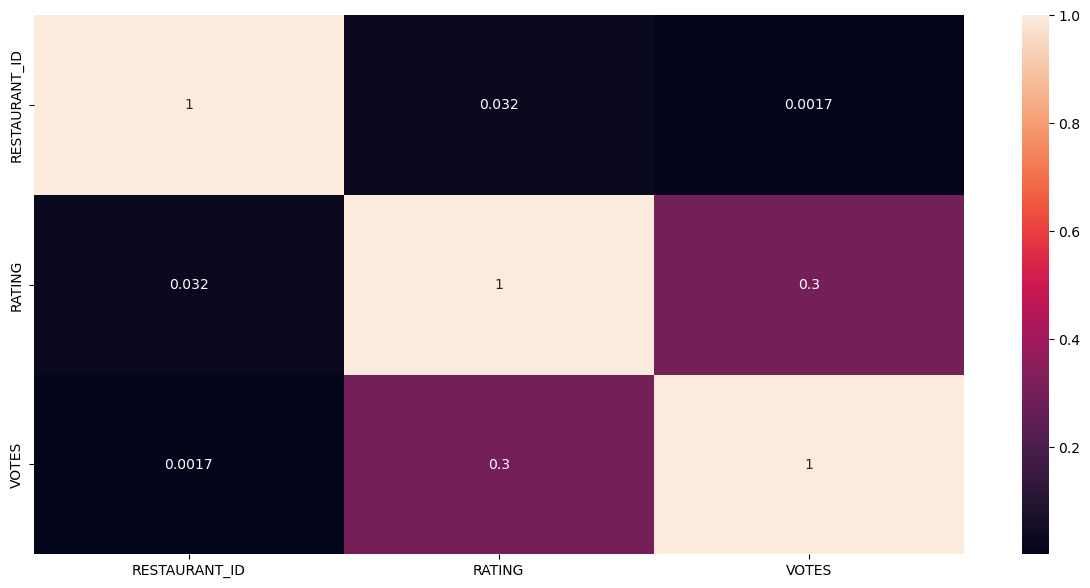

In [61]:
#checking for correlation in test dataset:-

cor_mat=df_test.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

# Combine the Both training and testing dataset:-

In [62]:
df=df_train.append(df_test,ignore_index=True)

In [63]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0
...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,1.0,0.0,NaN


In [64]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

# Handling the missing values:-

In [65]:
#Replacing the missing values in 'cost' column with mean value:

df['COST'].fillna(df['COST'].mean(),inplace=True)

In [66]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

<Axes: >

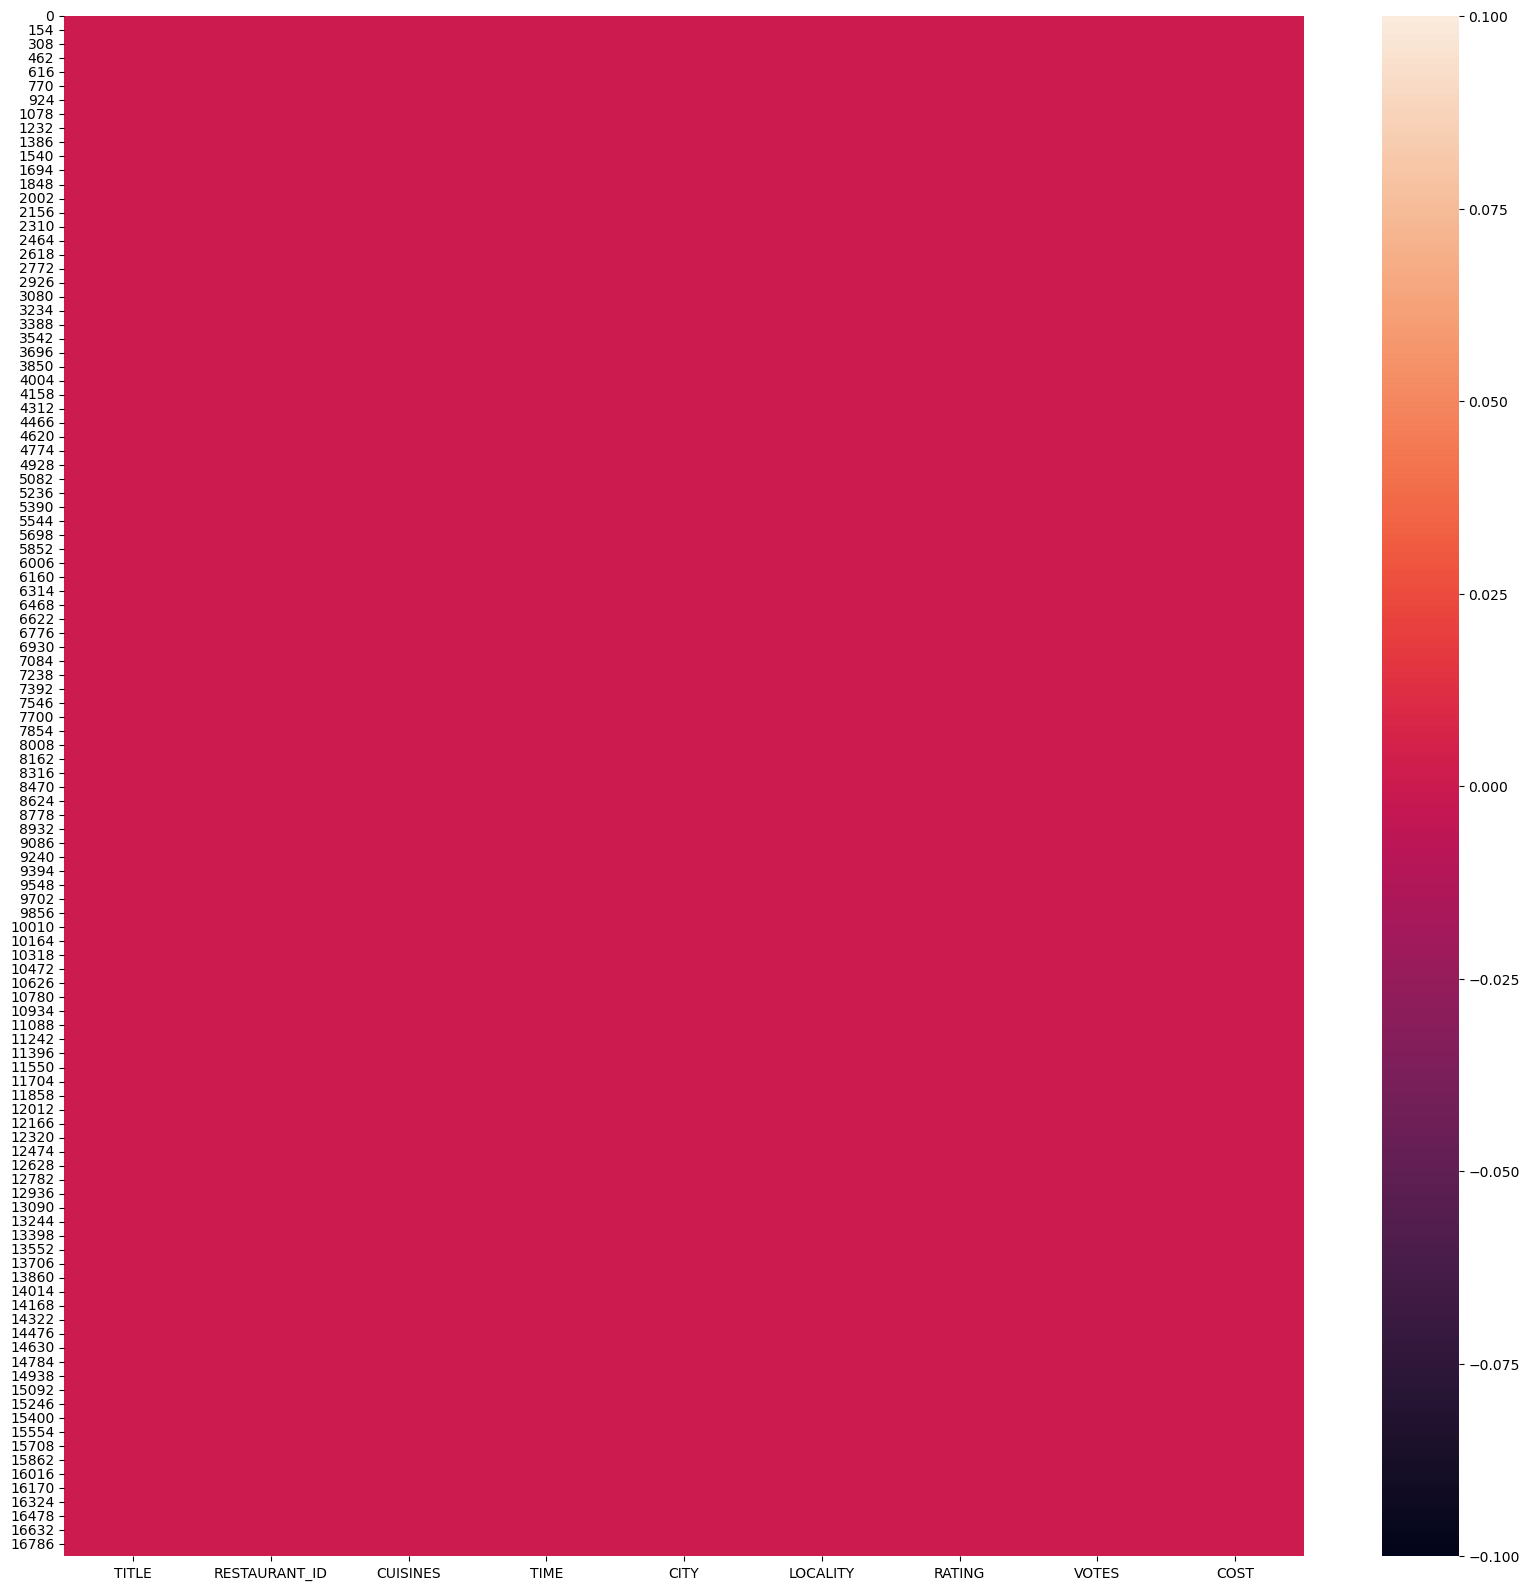

In [67]:
sns.heatmap(df.isnull())

In [68]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST             float64
dtype: object

In [69]:
df_cat=df.select_dtypes(np.object)
df_num=df.select_dtypes(np.number)

In [70]:
df_num

,RESTAURANT_ID,RATING,VOTES,COST
0,9438,3.6,49.0,1200.000000
1,13198,4.2,30.0,1500.000000
2,10915,3.8,221.0,800.000000
3,6346,4.1,24.0,800.000000
4,15387,3.8,165.0,300.000000
...,...,...,...,...
16916,9057,3.9,287.0,655.252246
16917,1247,4.3,469.0,655.252246
16918,8617,3.7,53.0,655.252246
16919,6485,1.0,0.0,655.252246


In [71]:
df_cat

,TITLE,CUISINES,TIME,CITY,LOCALITY
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel
...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout
16918,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86
16919,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi


# Apply ordinal encoder:-

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
enc=OrdinalEncoder()

In [74]:
#Apply ordinal encoder in train dataset:-

df['CITY']=enc.fit_transform(df[['CITY']])
df['LOCALITY']=enc.fit_transform(df[['LOCALITY']])
df['TITLE']=enc.fit_transform(df[['TITLE']])
df['CUISINES']=enc.fit_transform(df[['CUISINES']])
df['TIME']=enc.fit_transform(df[['TIME']])

In [75]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34.0,9438,3294.0,1125.0,401.0,328.0,3.6,49.0,1200.0
1,36.0,13198,364.0,2528.0,75.0,1215.0,4.2,30.0,1500.0
2,34.0,10915,3729.0,1033.0,75.0,1273.0,3.8,221.0,800.0
3,104.0,6346,5156.0,567.0,278.0,161.0,4.1,24.0,800.0
4,55.0,15387,2218.0,977.0,278.0,709.0,3.8,165.0,300.0


In [76]:
df.dtypes

TITLE            float64
RESTAURANT_ID      int64
CUISINES         float64
TIME             float64
CITY             float64
LOCALITY         float64
RATING           float64
VOTES            float64
COST             float64
dtype: object

# Outliers Removal:-

In [77]:
import scipy.stats as stats
from scipy.stats import zscore

In [78]:
#z score method:

z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34.0,9438,3294.0,1125.0,401.0,328.0,3.6,49.0,1200.000000
1,36.0,13198,364.0,2528.0,75.0,1215.0,4.2,30.0,1500.000000
2,34.0,10915,3729.0,1033.0,75.0,1273.0,3.8,221.0,800.000000
3,104.0,6346,5156.0,567.0,278.0,161.0,4.1,24.0,800.000000
4,55.0,15387,2218.0,977.0,278.0,709.0,3.8,165.0,300.000000
...,...,...,...,...,...,...,...,...,...
16916,34.0,9057,4259.0,517.0,317.0,1185.0,3.9,287.0,655.252246
16917,95.0,1247,785.0,977.0,42.0,461.0,4.3,469.0,655.252246
16918,104.0,8617,2089.0,3123.0,128.0,1371.0,3.7,53.0,655.252246
16919,104.0,6485,4580.0,832.0,216.0,642.0,1.0,0.0,655.252246


# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

In [79]:
x=df_new.drop('COST',axis=1) #List of all feature
y=df_new['COST'] #Label

print(x.shape)
print(y.shape)

(16319, 8)
(16319,)


In [80]:
x.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,34.0,9438,3294.0,1125.0,401.0,328.0,3.6,49.0
1,36.0,13198,364.0,2528.0,75.0,1215.0,4.2,30.0
2,34.0,10915,3729.0,1033.0,75.0,1273.0,3.8,221.0
3,104.0,6346,5156.0,567.0,278.0,161.0,4.1,24.0
4,55.0,15387,2218.0,977.0,278.0,709.0,3.8,165.0


In [81]:
y.head()

0    1200.0
1    1500.0
2     800.0
3     800.0
4     300.0
Name: COST, dtype: float64

# Feature Scaling:-

In [82]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.866075,0.375266,0.326587,-0.521195,2.096805,-0.932182,0.114175,-0.572758
1,-0.810798,1.213192,-1.613400,1.000317,-0.951252,1.001250,0.770583,-0.615484
2,-0.866075,0.704419,0.614606,-0.620966,-0.951252,1.127675,0.332977,-0.185972
3,1.068617,-0.313795,1.559439,-1.126329,0.946771,-1.296199,0.661182,-0.628977
4,-0.285667,1.701016,-0.385845,-0.681696,0.946771,-0.101700,0.332977,-0.311902
...,...,...,...,...,...,...,...,...
16314,-0.866075,0.290359,0.965525,-1.180553,1.311416,0.935857,0.442379,-0.037554
16315,0.819871,-1.450120,-1.334651,-0.681696,-1.259798,-0.642276,0.879984,0.371720
16316,1.068617,0.192304,-0.471257,1.645577,-0.455709,1.341290,0.223576,-0.563763
16317,1.068617,-0.282818,1.178063,-0.838944,0.367079,-0.247743,-2.730262,-0.682947


# Multicollinearity using Variance_inflation_factor:-

In [83]:
import statsmodels

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.109277,TITLE
1,1.004326,RESTAURANT_ID
2,1.084913,CUISINES
3,1.016407,TIME
4,1.014736,CITY
5,1.005165,LOCALITY
6,1.183063,RATING
7,1.214082,VOTES


In [86]:
#import libraries:-
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [88]:
X_train.shape

(12239, 8)

In [89]:
y_train.shape

(12239,)

In [90]:
X_test.shape

(4080, 8)

In [91]:
y_test.shape

(4080,)

# Model building:-

# Linear Regression:

In [92]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score: 0.213097750258899
R2_score on training data: 21.756575200008143
Mean Absolute Error: 225.0285473151
Mean Squared Error: 102491.0590273397
Root Mean Squared Error: 320.1422481137716


# Decision Tree Regressor:-

In [93]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_DTR=DTR.predict(X_test)
pred_train=DTR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_DTR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: -0.10539858947261593
R2_score on training data: 99.99040973379105
Mean Absolute Error: 266.0599441431419
Mean Squared Error: 143974.00963035834
Root Mean Squared Error: 379.4390723559691


# Random forest Regressor:-

In [94]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
pred_train=rf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2_score: 0.4702999718963411
R2_score on training data: 92.34832462778702
Mean Absolute Error: 194.9692470984591
Mean Squared Error: 68991.43682079625
Root Mean Squared Error: 262.6622104924807


# SVR using linear kernel:-

In [95]:
linear=SVR(kernel='linear')
linear.fit(X_train,y_train)
pred_linear=linear.predict(X_test)
pred_train=linear.predict(X_train)
print('R2_score:',r2_score(y_test,pred_linear))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

R2_score: 0.18155712846199956
R2_score on training data: 18.487030146467266
Mean Absolute Error: 219.86052349559884
Mean Squared Error: 106599.10641366828
Root Mean Squared Error: 326.4951858966197


# SVR using poly kernel:-

In [96]:
poly=SVR(kernel='poly')
poly.fit(X_train,y_train)
pred_poly=poly.predict(X_test)
pred_train=poly.predict(X_train)
print('R2_score:',r2_score(y_test,pred_poly))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_poly))
print('Mean Squared Error:',mean_squared_error(y_test,pred_poly))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_poly)))

R2_score: 0.14541546062052946
R2_score on training data: 14.500518004310358
Mean Absolute Error: 228.3791013507936
Mean Squared Error: 111306.42274591328
Root Mean Squared Error: 333.62617215367453


# SVR using rbf kernel:-

In [97]:
rbf=SVR(kernel='rbf')
rbf.fit(X_train,y_train)
pred_rbf=rbf.predict(X_test)
pred_train=rbf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf)))

R2_score: 0.15345968089194895
R2_score on training data: 16.03169325895195
Mean Absolute Error: 223.1503313068492
Mean Squared Error: 110258.69330437435
Root Mean Squared Error: 332.0522448416429


# KNeighbors Regressor:-

In [98]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred_KNN=KNN.predict(X_test)
pred_train=KNN.predict(X_train)
print('R2_score:',r2_score(y_test,pred_KNN))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error:',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score: 0.2157236970685409
R2_score on training data: 49.04570781549326
Mean Absolute Error: 229.0493075371993
Mean Squared Error: 102149.0393297747
Root Mean Squared Error: 319.6076334034823


# AdaBoostRegressor:-

In [99]:
ABR=AdaBoostRegressor()
ABR.fit(X_train,y_train)
pred_ABR=ABR.predict(X_test)
pred_train=ABR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_ABR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ABR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ABR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score: 0.09607550408470333
R2_score on training data: 8.863720051189405
Mean Absolute Error: 277.4144847028379
Mean Squared Error: 117732.76655085666
Root Mean Squared Error: 343.12208694698836


# GradientBoostingRegressor:-

In [100]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.44915408518126954
R2_score on training data: 48.95398376213858
Mean Absolute Error: 195.8553946032081
Mean Squared Error: 71745.6090502096
Root Mean Squared Error: 267.8537083002765


# Applying Grid Search:-

In [102]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [111]:
param_grid={'max_depth':[2,4,8,10,None],
    'criterion':['squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]}

In [112]:
reg=GridSearchCV(RandomForestRegressor(),param_grid=param_grid)

In [113]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [115]:
print("Best score:",reg.best_score_)
print("Best estimator:",reg.best_estimator_)
print("Best parameters:",reg.best_params_)

Best score: 0.2411128179968896
Best estimator: RandomForestRegressor(max_depth=8, max_features=0.5, min_samples_split=0.25)
Best parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 0.5, 'min_samples_split': 0.25}


In [117]:
rf_final=RandomForestRegressor(criterion='squared_error',max_depth=8,min_samples_split=0.25,max_features=0.5,random_state=42)

rf_final.fit(X_train,y_train)

predrf=rf_final.predict(X_test)

print('R2_score:',r2_score(y_test,predrf))
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

R2_score: 0.23601295859596239
Mean Absolute Error: 222.76759518709054
Mean Squared Error: 99506.43930987103
Root Mean Squared Error: 315.4464127389485


#After tweaking parameters we are getting the best accuracy score is 0.2360 which is less than the accuracy score of RandomForestregressor(0.4702) without hyper parameter tunning,so lets save the model in by default rf model.

# Prediction Results:-

In [126]:
results=pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','SVC using Linear','SVC using Poly','SVC using rbf','KNeighbors','Gradient Boosting','AdaBoost'],
    'Score': [0.2130,-0.1053,0.4702,0.1815,0.1454,0.1534,0.2157,0.0960,0.4491]})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
0.4702,Random Forest
0.4491,AdaBoost
0.2157,KNeighbors
0.2130,Logistic Regression
0.1815,SVC using Linear
0.1534,SVC using rbf
0.1454,SVC using Poly
0.0960,Gradient Boosting
-0.1053,Decision Tree


# Saving My Best Model:-

In [127]:
#From sklearn.externals import joblib
import joblib

In [128]:
#Save the model as a object file:
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [130]:
#Load the model from the file:
rf_from_joblib=joblib.load('rffile.obj')

In [131]:
#Use the loaded model to make predictions:
rf_from_joblib.predict(X_test)

array([1277.36558392,  926.86558392,  426.20801655, ...,  899.12819622,
        735.99585343,  443.52819622])